In [1]:
%load_ext autoreload
import re
import sys

sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from IPython.core.display import display

In [8]:
%autoreload
import experiment.resnet2d_binary as experiment
import src
from src.analyze import ResultAnalyzer, plot_learning_curve
from src.evaluator import Evaluator
from src.mit_data import MITDataset, MITImageDataset
from src.run import Run
from src.train import train
from src.video_handler import VideoViewer
import  experiment.cifar10 as experiment

In [ ]:
run_resnet2d_binary = Run("../experiment/resnet2d_binary/run_1215")

In [ ]:
run_resnet2d_binary.weights_available_step()

In [ ]:
cuda = torch.device("cuda:1")
dataset = experiment.dataset
dataloader = experiment.dataloader
val_dataloader = experiment.val_dataloader
model = experiment.model
model.load_state_dict(torch.load(run_resnet2d_binary.weight_step(5000), map_location=cuda))
model.to(device=cuda)

In [ ]:
eval_resnet_binary = Evaluator(experiment.mlb)
eval_resnet_binary.run(
    model,
    val_dataloader,
    device=cuda,
    result_file=run_resnet2d_binary.val_eval_step(5000))

In [ ]:
analyze_resnet_binary_val = ResultAnalyzer(run_resnet2d_binary.val_eval_step(5000))
analyze_resnet_binary_val.auc()

In [ ]:
evalu_train = Evaluator(experiment.mlb)
evalu_train.run(
    model, dataloader, run_resnet2d_binary.train_eval_step(5000), device=cuda)

In [ ]:
analyze_resnet_binary_train = ResultAnalyzer(run_resnet2d_binary.train_eval_step(5000))
analyze_resnet_binary_train.auc()

In [ ]:
result_high_man_prediction = sorted(analyze_resnet_binary_val.result, key=lambda result: result["score"][0], reverse=True)
result_low_man_prediction = sorted(analyze_resnet_binary_val.result, key=lambda result: result["score"][0])

In [ ]:
for i in range(40):
    idx = i * 32
    sample = result_high_man_prediction[idx]
    sample_image = VideoViewer(sample["video"]).image_as_PIL(20)
    display(sample_image)

In [ ]:
for i in range(40):
    idx = i * 32
    sample = result_low_man_prediction[idx]
    sample_image = VideoViewer(sample["video"]).image_as_PIL(20)
    display(sample_image)

In [ ]:
result_low_man_prediction

In [ ]:
result_train_high_man_prediction = sorted(analyze_resnet_binary_train.result, key=lambda result: result["score"][0], reverse=True)
result_train_low_man_prediction = sorted(analyze_resnet_binary_train.result, key=lambda result: result["score"][0])

In [ ]:
result_train_high_man_prediction

In [ ]:
for i in range(40):
    idx = i * 32
    sample = result_train_high_man_prediction[idx]
    sample_image = VideoViewer(sample["video"]).image_as_PIL(20)
    display(sample_image)

In [3]:
run_cifar = Run("../experiment/cifar10/test1217_lowlr/")

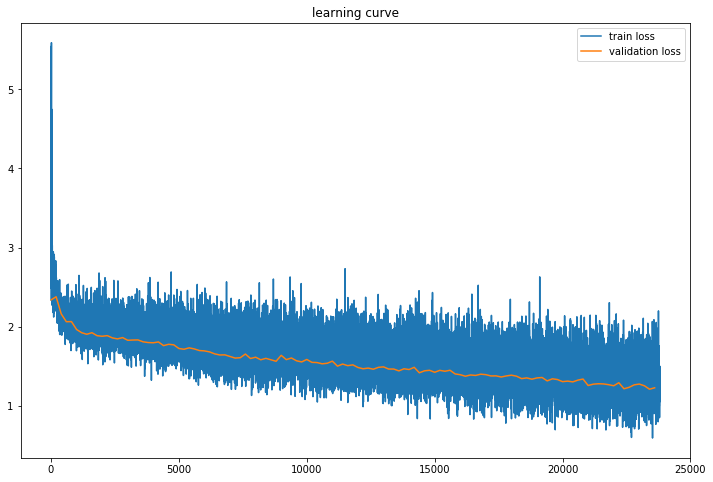

In [25]:
plot_learning_curve(
    run_cifar.log_file,
    run_cifar.figure_file("learning_curve.pdf"),
    figsize=(12, 8))

In [ ]:
plot_learning_curve(
    run_resnet2d_binary.log_file,
    run_resnet2d_binary.figure_file("learning_curve.pdf"),
    figsize=(12, 8))

In [6]:
cuda = torch.device("cuda:1")
model = experiment.model
model.load_state_dict(torch.load(run_cifar.weight_step(7500), map_location=cuda))
model.to(device=cuda)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [9]:
evalu_cifar = Evaluator()
evalu_cifar.run(experiment.model, experiment.testloader,run_cifar.val_eval_step(7500),device=cuda)

2490880
inferencing number    0
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
2490880
inferencing number    1
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
2490880
inferencing number    2
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
2490880
inferencing number    3
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
2490880
inferencing number    4
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
2490880
inferencing number    5
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
2490880
inferencing number    6
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
2490880
inferencing number    7
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
2490880
inferencing number    8
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
2490880
inferencing number    9
saving result 

0
inferencing number   80
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number   81
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number   82
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number   83
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number   84
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number   85
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number   86
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number   87
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number   88
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number   89
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


0
inferencing number  163
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  164
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  165
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  166
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  167
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  168
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  169
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  170
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  171
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  172
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


0
inferencing number  245
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  246
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  247
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  248
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  249
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  250
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  251
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  252
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  253
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  254
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  329
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  330
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  331
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  332
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  333
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  334
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  335
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  336
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  337
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  338


0
inferencing number  411
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  412
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  413
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  414
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  415
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  416
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  417
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  418
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  419
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  420
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  494
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  495
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  496
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  497
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  498
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  499
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  500
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  501
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  502
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  503


saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  576
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  577
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  578
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  579
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  580
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  581
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  582
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  583
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  584
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  585


saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  658
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  659
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  660
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  661
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  662
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  663
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  664
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  665
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  666
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  667


saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  740
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  741
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  742
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  743
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  744
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  745
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  746
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  747
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  748
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  749


saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  822
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  823
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  824
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  825
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  826
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  827
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  828
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  829
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  830
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  831


0
inferencing number  904
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  905
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  906
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  907
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  908
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  909
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  910
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  911
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  912
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  913
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  987
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  988
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  989
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  990
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  991
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  992
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  993
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  994
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  995
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number  996


0
inferencing number 1069
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1070
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1071
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1072
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1073
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1074
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1075
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1076
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1077
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1078
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


0
inferencing number 1151
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1152
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1153
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1154
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1155
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1156
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1157
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1158
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1159
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1160
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


0
inferencing number 1233
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1234
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1235
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1236
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1237
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1238
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1239
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1240
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1241
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1242
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


0
inferencing number 1315
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1316
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1317
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1318
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1319
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1320
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1321
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1322
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1323
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1324
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


0
inferencing number 1397
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1398
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1399
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1400
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1401
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1402
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1403
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1404
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1405
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1406
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


0
inferencing number 1479
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1480
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1481
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1482
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1483
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1484
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1485
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1486
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1487
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1488
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


0
inferencing number 1561
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1562
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1563
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1564
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1565
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1566
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1567
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1568
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1569
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1570
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


0
inferencing number 1643
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1644
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1645
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1646
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1647
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1648
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1649
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1650
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1651
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1652
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


0
inferencing number 1725
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1726
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1727
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1728
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1729
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1730
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1731
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1732
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1733
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1734
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


0
inferencing number 1807
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1808
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1809
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1810
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1811
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1812
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1813
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1814
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1815
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1816
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


0
inferencing number 1889
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1890
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1891
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1892
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1893
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1894
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1895
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1896
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1897
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1898
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


0
inferencing number 1971
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1972
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1973
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1974
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1975
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1976
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1977
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1978
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1979
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 1980
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


0
inferencing number 2053
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2054
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2055
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2056
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2057
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2058
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2059
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2060
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2061
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2062
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


0
inferencing number 2135
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2136
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2137
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2138
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2139
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2140
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2141
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2142
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2143
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2144
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


0
inferencing number 2217
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2218
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2219
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2220
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2221
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2222
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2223
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2224
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2225
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2226
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


0
inferencing number 2299
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2300
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2301
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2302
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2303
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2304
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2305
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2306
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2307
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2308
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


0
inferencing number 2381
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2382
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2383
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2384
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2385
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2386
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2387
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2388
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2389
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2390
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


0
inferencing number 2463
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2464
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2465
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2466
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2467
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2468
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2469
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2470
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2471
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv
0
inferencing number 2472
saving result to ../experiment/cifar10/test1217_lowlr/val_eval_007500.csv


[{'label': array(3),
  'score': array([ 0.04130555,  0.12898323,  0.74390119,  0.87072635,  0.81549788,
          0.91912293,  0.87619346,  0.8793152 ,  0.00950638,  0.2145496 ], dtype=float32)},
 {'label': array(8),
  'score': array([ 0.8231203 ,  0.94925809,  0.27960065,  0.20136353,  0.24290428,
          0.06322548,  0.17356828,  0.25501806,  0.88839483,  0.88322997], dtype=float32)},
 {'label': array(8),
  'score': array([ 0.60667437,  0.21347153,  0.53278208,  0.46415466,  0.4264124 ,
          0.45776331,  0.28503516,  0.68062925,  0.60348564,  0.68472028], dtype=float32)},
 {'label': array(0),
  'score': array([ 0.81233782,  0.81622559,  0.4446477 ,  0.40543327,  0.41056499,
          0.2058785 ,  0.35274646,  0.07656897,  0.90967894,  0.46835893], dtype=float32)},
 {'label': array(6),
  'score': array([ 0.2641497 ,  0.16378224,  0.61220437,  0.81461817,  0.65566546,
          0.82250255,  0.74942374,  0.43837899,  0.24047486,  0.19703317], dtype=float32)},
 {'label': array(6),

In [12]:
analyzer = ResultAnalyzer(run_cifar.val_eval_step(7500), "../experiment/top_30_class/index.csv")

In [14]:
res = analyzer.result

In [19]:
acc = 0
for data in res:
     predicted_label = np.argmax(data["score"])
     label = data["label"]
     if label == predicted_label:
         acc += 1

In [23]:
acc /= 10000

In [24]:
acc

0.3488